In [1]:
!pip install -q transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 19.5 MB/s eta 0:00:00


In [2]:
!pip install pydot

In [3]:
from transformers import BertTokenizer, TFBertModel

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow import keras

import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

In [9]:
import json
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
# Load JSONL dataset
data = []
train_texts=[]
train_labels=[]
# get train example and label
with open('/content/sample_data/train.json', 'r') as f:
    for line in f:
      text=json.loads(line)
      data.append(text)
      train_texts.append(text['sentence_normalized'])
      polarity=int(text['targets'][0]['polarity'])
      if polarity==2:
        train_labels.append(0)
      elif polarity==4:
        train_labels.append(1)
      elif polarity==6:
        train_labels.append(2)
      else:
        print('error')











# Preprocess Data and Tokenization



#print(data[0])


In [10]:
print(train_texts[2])

Pentru La Stampa, "era clar încă de la întâlnirea romană dintre Monti, Merkel, Hollande şi Rajoy", din 22 iunie, că acest Consiliu care a început astăzi "va fi prima şi cea mai grea încercare prin care conducătorii europeni vor încerca să fondeze, şi, cine ştie, să lanseze, o nouă uniune monetară":


In [11]:

# Load JSONL dataset
data_test = []
test_texts=[]
test_labels=[]
# get test example and label
with open('/content/sample_data/test.jsonl', 'r') as f:
    for line in f:
      text=json.loads(line)
      data_test.append(text)
      test_texts.append(text['sentence_normalized'])
      polarity=int(text['targets'][0]['polarity'])
      if polarity==2:
        test_labels.append(0)
      elif polarity==4:
        test_labels.append(1)
      elif polarity==6:
        test_labels.append(2)
      else:
        print('error')


In [12]:
print(len(test_texts))

1000


In [13]:
# Load JSONL dataset
data_vali = []
valid_texts=[]
valid_labels=[]
# get valid example and label
with open('/content/sample_data/validation.jsonl', 'r') as f:
    for line in f:
      text=json.loads(line)
      data_vali.append(text)
      valid_texts.append(text['sentence_normalized'])
      polarity=int(text['targets'][0]['polarity'])
      if polarity==2:
        valid_labels.append(0)
      elif polarity==4:
        valid_labels.append(1)
      elif polarity==6:
        valid_labels.append(2)
      else:
        print('error')

In [14]:
print(len(valid_texts))

300


In [15]:
integer_counts = Counter(valid_labels)
# Print the summary
for integer, count in integer_counts.items():
    print(f"Integer {integer} appears {count} times")

Integer 2 appears 71 times
Integer 1 appears 117 times
Integer 0 appears 112 times


In [16]:
integer_counts = Counter(test_labels)
# Print the summary
for integer, count in integer_counts.items():
    print(f"Integer {integer} appears {count} times")

Integer 1 appears 401 times
Integer 0 appears 364 times
Integer 2 appears 235 times


In [17]:
integer_counts = Counter(train_labels)
# Print the summary
for integer, count in integer_counts.items():
    print(f"Integer {integer} appears {count} times")

Integer 1 appears 1493 times
Integer 0 appears 1363 times
Integer 2 appears 954 times


In [18]:
#baseline multinomial Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [19]:
# Training data

# Create a pipeline with CountVectorizer and MultinomialNB
pipeline = Pipeline([
    ('vect', CountVectorizer()),  # Convert text to word count vectors
    ('clf', MultinomialNB()),     # Multinomial Naive Bayes classifier
])
# Train the model
pipeline.fit(train_texts, train_labels)
# Test the model
# Example test data

# Predict sentiment for test data
predictions = pipeline.predict(test_texts)
print(predictions)

[1 0 0 0 1 0 1 0 1 0 1 0 2 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 2 0 0 1 0 2 1 1
 1 1 1 0 1 1 1 2 2 0 1 0 2 0 1 0 0 1 0 0 2 1 1 0 2 1 0 1 0 0 1 0 0 1 2 0 0
 0 1 0 1 0 1 0 1 1 1 1 0 0 2 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 2 1 1
 0 0 1 0 0 0 0 1 0 1 0 1 0 2 1 0 1 1 1 0 1 1 0 2 0 0 2 1 2 0 1 1 0 1 1 0 0
 0 2 1 1 2 0 0 1 1 0 0 1 2 0 1 1 0 1 1 1 0 0 1 0 0 1 2 0 0 0 0 0 0 2 1 0 1
 1 1 2 1 1 1 2 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 2 0 1 2 0 1 0
 1 1 0 2 0 0 0 0 1 0 0 1 1 2 0 2 0 1 1 2 0 2 1 1 0 1 1 1 2 0 0 0 0 1 0 0 1
 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 2 0 0 1 2 0 1 0 0 0 1 0 0 1 0
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 2 0 2 0 2 0 0 0 0 0 0 1 0 1 1 0 0 2 1 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 2 0 1 2 0 0 1 1 0 0 1 0 0 1 1 0 1 1 2 0 1 0
 0 0 1 0 0 0 1 1 0 1 1 0 0 2 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 2 0 1 0
 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0
 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 2 0 1 0 1 2 0 0 0 0 0 1 2 1 0 1 0 0 1
 0 1 0 0 1 1 0 1 0 1 0 1 

In [20]:
# Evaluate model performance
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.572


In [21]:
model_checkpoint = 'bert-base-cased'

In [22]:
bert_tokenizer = BertTokenizer.from_pretrained(model_checkpoint)
bert_model = TFBertModel.from_pretrained(model_checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [23]:
max_length = 50

In [24]:
# tokenize the dataset, truncate at `max_length`,
# and pad with 0's when less than `max_length` and return a tf Tensor
train_encodings = bert_tokenizer(train_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')
valid_encodings = bert_tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')
test_encodings = bert_tokenizer(test_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')

In [25]:
train_encodings.input_ids[:1]

<tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[  101,   236,  1179,   172, 19009,  1810,   172, 19773,  1197,
          195, 10294,  1162,  1126,  1182,  1260,  4252,  3365,  8584,
        28248, 15287,   260,  1179,  3073,  1116, 15287,   117,   179,
        17384, 14200,  1777, 13187,  6409, 15287,  1260,  4247,  1162,
         4554,  2050, 17054, 15287, 15686, 27901, 27647,  1233,   183,
         1358,   170, 25247,  8830,   102]], dtype=int32)>

In [26]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
def create_bert_multiclass_model(checkpoint = model_checkpoint,
                                 num_classes = 3,
                                 hidden_size = 201,
                                 dropout=0.3,
                                 learning_rate=0.00005):
    """
    Build a simple classification model with BERT. Use the Pooler Output for classification purposes.
    """
    ### YOUR CODE HERE

    bert_model = TFBertModel.from_pretrained(checkpoint)

    # Freeze BERT layers to prevent training
    for layer in bert_model.layers:
        layer.trainable = False

    # Define input layers
    input_ids = Input(shape=(max_length,), dtype='int32', name='input_ids')

    token_type_ids = Input(shape=(max_length,), dtype='int32', name='token_type_ids')
    attention_mask = Input(shape=(max_length,), dtype='int32', name='attention_mask')



    # Get BERT output
    bert_output = bert_model(input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)[1]  # Pooler output




    # Add hidden layer with dropout
    hidden_layer = Dense(hidden_size, activation='relu', name='hidden_layer')(bert_output)
    dropout_layer = Dropout(dropout)(hidden_layer)

    # Add classification layer
    output = Dense(num_classes, activation='softmax', name='output')(dropout_layer)  # Softmax for multi-class classification

    # Create model
    classification_model = Model(inputs=[input_ids, token_type_ids, attention_mask], outputs=output)

    # Compile model
    classification_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                                 loss='sparse_categorical_crossentropy',
                                 metrics=['accuracy'])

    ### END YOUR CODE
    return classification_model

In [27]:
pooler_bert_model = create_bert_multiclass_model(checkpoint=model_checkpoint, num_classes=3)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [28]:
pooler_bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 50)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 50)]                 0         []                            
 )                                                                                                
                                                                                                  
 token_type_ids (InputLayer  [(None, 50)]                 0         []                            
 )                                                                                                
                                                                                              

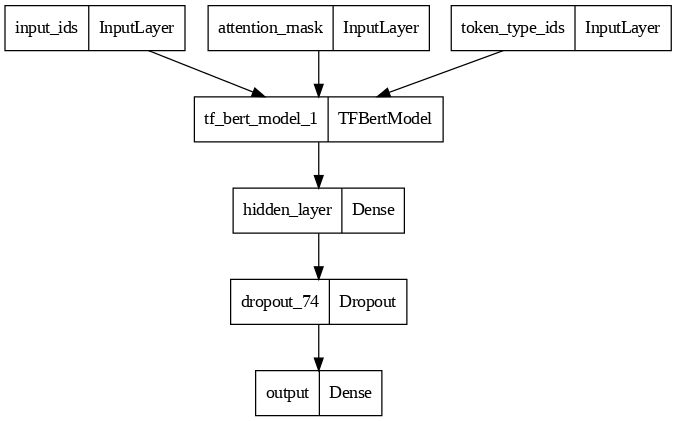

In [29]:
keras.utils.plot_model(pooler_bert_model, show_shapes=False, show_dtype=False, show_layer_names=True, dpi=90)

In [30]:
#get the labels in a needed data format for validation
npvalid_labels = np.asarray(valid_labels)

In [31]:
import numpy as np  # Ensure numpy is imported

# Convert train_labels and valid_labels to numpy arrays if they are not already
train_labels = np.array(train_labels)
valid_labels = np.array(valid_labels)

# Use a dictionary to pass input data to the fit method
input_data_train = {
    'input_ids': train_encodings.input_ids,
    'token_type_ids': train_encodings.token_type_ids,
    'attention_mask': train_encodings.attention_mask
}

input_data_valid = {
    'input_ids': valid_encodings.input_ids,
    'token_type_ids': valid_encodings.token_type_ids,
    'attention_mask': valid_encodings.attention_mask
}

# Fit the model using the dictionary format for input data
pooler_bert_model_history = pooler_bert_model.fit(
    x=input_data_train,
    y=train_labels,
    validation_data=(input_data_valid, valid_labels),
    batch_size=8,
    epochs=3
)

Epoch 1/3
477/477 [==============================] - 759s 2s/step - loss: 1.1365 - accuracy: 0.3625 - val_loss: 1.0862 - val_accuracy: 0.3967
Epoch 2/3
477/477 [==============================] - 701s 1s/step - loss: 1.1014 - accuracy: 0.3843 - val_loss: 1.0825 - val_accuracy: 0.3933
Epoch 3/3
477/477 [==============================] - 730s 2s/step - loss: 1.0922 - accuracy: 0.3727 - val_loss: 1.0769 - val_accuracy: 0.3900


In [32]:
# Convert test_labels to a numpy array if it is not already
test_labels = np.array(test_labels)

# Use a dictionary to pass input data to the evaluate method
input_data_test = {
    'input_ids': test_encodings.input_ids,
    'token_type_ids': test_encodings.token_type_ids,
    'attention_mask': test_encodings.attention_mask
}

# Evaluate the model using the dictionary format for input data
score = pooler_bert_model.evaluate(
    x=input_data_test,
    y=test_labels
)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


32/32 [==============================] - 156s 5s/step - loss: 1.0736 - accuracy: 0.4100
Test loss: 1.0736027956008911
Test accuracy: 0.4099999964237213


In [33]:
predictions = pooler_bert_model.predict([test_encodings.input_ids[:3], test_encodings.token_type_ids[:3], test_encodings.attention_mask[:3]])

1/1 [==============================] - 4s 4s/step


In [34]:
predictions = pooler_bert_model.predict(
    [test_encodings.input_ids, test_encodings.token_type_ids, test_encodings.attention_mask]
)
predictions_model1 = tf.argmax(predictions, axis=-1)
predictions_model1

32/32 [==============================] - 154s 5s/step


<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
    

In [35]:
target_names=['negative','neutral','positive']

In [36]:
print(classification_report(test_labels, predictions_model1.numpy(), target_names=target_names))

              precision    recall  f1-score   support

    negative       0.40      0.62      0.48       364
     neutral       0.43      0.46      0.44       401
    positive       0.00      0.00      0.00       235

    accuracy                           0.41      1000
   macro avg       0.28      0.36      0.31      1000
weighted avg       0.32      0.41      0.35      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
